## Quick and dirty compare

Sometimes all your need is a simple comparison of two time series. The `fmskill.compare()` method does just that.

In [10]:
from mikeio import Dfs0
import fmskill

### The model
Can be either a dfs0 or a DataFrame. 

In [11]:
fn_mod = '../tests/testdata/SW/ts_storm_4.dfs0'
df_mod = Dfs0(fn_mod).read(items=0).to_dataframe()  # select 1 item

### The observation
Can be either a dfs0, a DataFrame or a PointObservation object. 

In [12]:
fn_obs = '../tests/testdata/SW/eur_Hm0.dfs0'

### compare()

The compare() method will return an object that can be used for scatter plots, skill assessment, time series plots etc.

If the observation or model has more than 1 item, the `obs_item` or `mod_item` can be given to specify the relevant item. 

In [13]:
c = fmskill.compare(fn_obs, df_mod)   # both with 1 item only
#c = fmskill.compare(fn_obs, fn_mod, mod_item=0) # need to specify item in model file

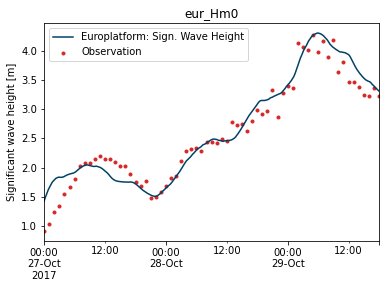

In [14]:
c.plot_timeseries();

In [15]:
c.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
eur_Hm0,67,0.052239,0.22824,0.222181,0.174851,0.968321,0.081499,0.929767


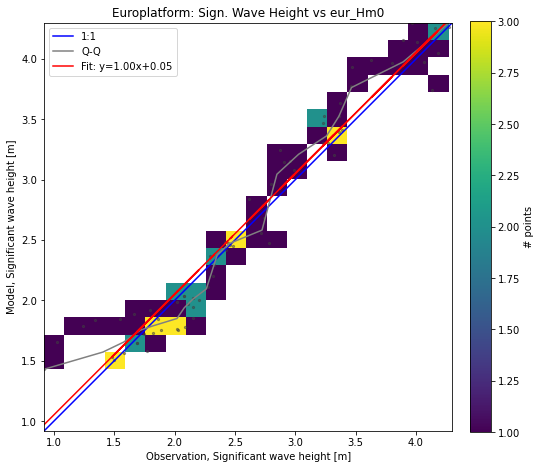

In [16]:
c.scatter()

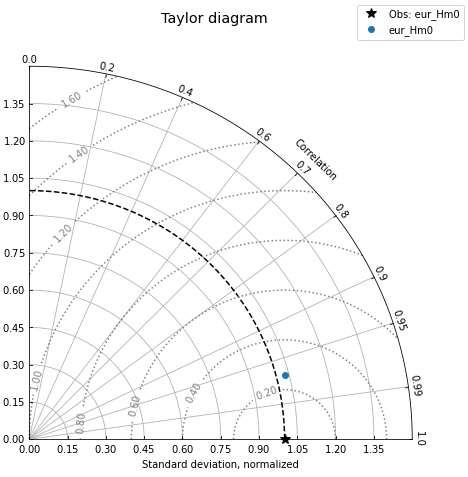

In [18]:
c.taylor(normalize_std=True)